In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,roc_curve, recall_score, f1_score, confusion_matrix 
from sklearn import preprocessing 

In [71]:
data=pd.read_csv("C:/Users/PP/Desktop/Netzwerk assignments/ML Assignments/Logistic_Regression_Binary_Classsification_Churn_Data.csv")

In [72]:
data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [74]:
df=pd.DataFrame(data)

In [75]:
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [76]:
def convert(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0

In [77]:
df['Churn']=df['Churn'].apply(convert)

In [78]:
df['PhoneService']=df['PhoneService'].apply(convert)

In [79]:
df['PaperlessBilling']=df['PaperlessBilling'].apply(convert)

In [104]:
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,142,2505,0
1,5575-GNVDE,34,1,One year,0,Mailed check,498,1466,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,436,157,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),266,1400,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,729,925,1
5,9305-CDSKC,8,1,Month-to-month,1,Electronic check,1274,6104,1
6,1452-KIOVK,22,1,Month-to-month,1,Credit card (automatic),1075,1550,0
7,6713-OKOMC,10,0,Month-to-month,0,Mailed check,140,2609,0
8,7892-POOKP,28,1,Month-to-month,1,Electronic check,1371,2646,1
9,6388-TABGU,62,1,One year,0,Bank transfer (automatic),482,3022,0


In [105]:
label_encoder = preprocessing.LabelEncoder() 
  
df['tenure']= label_encoder.fit_transform(df['tenure']) 
  
df['tenure'].unique() 


  
df['MonthlyCharges']= label_encoder.fit_transform(df['MonthlyCharges']) 
  
df['MonthlyCharges'].unique() 


  
df['TotalCharges']= label_encoder.fit_transform(df['TotalCharges']) 
  
df['TotalCharges'].unique() 


  
df['Churn']= label_encoder.fit_transform(df['Churn']) 
  
df['Churn'].unique() 

array([0, 1], dtype=int64)

In [106]:
dfdata=df.drop(['customerID','Contract','PaymentMethod','PaperlessBilling','PhoneService'],axis=1)

In [107]:
x=dfdata.drop('Churn',axis=1)
y=dfdata.Churn

print(x)

      tenure  MonthlyCharges  TotalCharges
0          1             142          2505
1         34             498          1466
2          2             436           157
3         45             266          1400
4          2             729           925
5          8            1274          6104
6         22            1075          1550
7         10             140          2609
8         28            1371          2646
9         62             482          3022
10        13             375          4823
11        16               8          2836
12        58            1288          4693
13        49            1349          4265
14        25            1385          2337
15        69            1519          5959
16        52              42            46
17        71            1409          5704
18        10             463          4416
19        21            1094          1433
20         1             237          3340
21        12              25          1651
22         

In [108]:
y

0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      0
26      1
27      1
28      0
29      1
       ..
7013    0
7014    0
7015    0
7016    0
7017    0
7018    1
7019    0
7020    0
7021    1
7022    0
7023    0
7024    0
7025    0
7026    1
7027    0
7028    0
7029    0
7030    0
7031    0
7032    1
7033    0
7034    1
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [199]:
log=LogisticRegression()

In [200]:
log.fit(x_train,y_train)

C:\Users\PP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
pred = log.predict(x_test)

In [202]:
pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [203]:
confusion_matrix(y_test, pred)

array([[1176,  107],
       [ 276,  202]], dtype=int64)

In [204]:
log.score(x_test, y_test)

0.7825099375354913

In [205]:
recall_score(y_test, pred)

0.4225941422594142

In [206]:
f1_score(y_test, pred)

0.5133418043202034

In [207]:
y_pred_prob = log.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

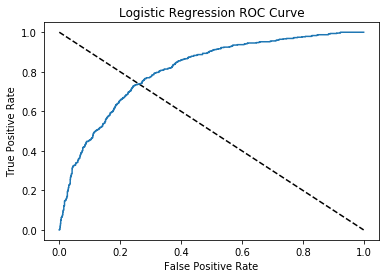

In [208]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()